# Jumpman23 - New Market Analysis, New York City

Jumpman23 is an on-demand delivery platform connecting "Jumpmen" and customers purchasing a variety of goods. Jumpman23 will send Jumpmen to merchants to purchase and pickup any items requested by the customer. Whenever possible, Jumpman23 will order the requested items ahead to save the Jumpmen time. Each time a Jumpman23 delivery is completed, a record is saved to the Jumpman23 database that contains information about that delivery. Jumpman23 is growing fast and has just launched in its newest market - New York City

# Dataset

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date

In [49]:
#read in dataset
jumpman23 = pd.read_csv("analyze_me.csv")

In [ ]:
jumpman23.head()

# Find Missing Values

In [ ]:
#find missing values
jumpman23.isnull().sum()

In [ ]:
# check what percentage the missing values are of the entire proportion
round((jumpman23.isnull().sum() / jumpman23.count()),2)*100

Several variables are missing rows. It looks the variables that are missing any values are related to the restaurant and items. This could be variables that Jumpman23 has no control of inputting. Possibly it could mean the restaurant and the Jumpmen not recording information correctly.


    - place_category
    - item_name
    - item_quantity
    - item_category_name
    - how_long_it_took_to_order
    - when_the_Jumpman_arrived_at_pickup      
    - when_the_Jumpman_left_pickup       

In [ ]:
# count the rows in each column
col_names = jumpman23.columns

for col in col_names:
    count = jumpman23[col].count()
    print("{} row count: {}".format(col, count))

Some interesting information here.

    1. We see information with "item" all have the same amount of data entries - all have 4753 entries
    2. how_long_it_took_to_order is missing significantly more entries than any other column - total 3038 entries
    3. jumpman arrival and departure from pickup location are the same but are missing approximately 500 entries from the entire dataset

In [ ]:
#explore data types
jumpman23.info()

The last four columns should be tagged as datetime stamp.

-----------------------------------------------------

# Timestamps
Convert objects that should be timestamps

In [3]:
#convert to datetime function
def convert_to_datetime(col):
    jumpman23[col] = pd.to_datetime(jumpman23[col])

In [ ]:
jumpman23["when_the_delivery_started"] = pd.to_datetime(jumpman23["when_the_delivery_started"],  errors='ignore') 

In [4]:
#run function on columns that should be date time
convert_to_datetime("when_the_delivery_started")
convert_to_datetime("when_the_Jumpman_arrived_at_pickup")
convert_to_datetime("when_the_Jumpman_left_pickup")
convert_to_datetime("when_the_Jumpman_arrived_at_dropoff")

In [16]:
# #if you wanted to split the date and time to separate columns
# #jumpman23['Dates'] = pd.to_datetime(jumpman23['when_the_delivery_started']).dt.date
# jumpman23['delivery_started'] = pd.to_datetime(jumpman23['when_the_delivery_started']).dt.time
# jumpman23['jumpman_arrival'] = pd.to_datetime(jumpman23['when_the_Jumpman_arrived_at_pickup']).dt.time
# jumpman23['jumpman_departure'] = pd.to_datetime(jumpman23['when_the_Jumpman_left_pickup']).dt.time
# jumpman23['delivery_completed'] = pd.to_datetime(jumpman23['when_the_Jumpman_arrived_at_dropoff']).dt.time

In [ ]:
jumpman23.head()

### Overall time it takes from ordering to being delivered

In [14]:
not_missing_arrival = jumpman23[jumpman23["when_the_Jumpman_arrived_at_pickup"].notnull()]
(not_missing_arrival["when_the_Jumpman_arrived_at_dropoff"] - not_missing_arrival["when_the_delivery_started"]).mean()


Timedelta('0 days 00:45:45.633893')

### Time it takes from order to arriving at store location for pickup

In [6]:
time_till_arrival = not_missing_arrival["when_the_Jumpman_arrived_at_pickup"] - not_missing_arrival["when_the_delivery_started"]
time_till_arrival.mean()

Timedelta('0 days 00:12:42.552907')

### Time it takes waiting at the location

In [7]:
time_waiting_restaurant = not_missing_arrival["when_the_Jumpman_left_pickup"] - not_missing_arrival["when_the_Jumpman_arrived_at_pickup"]
time_waiting_restaurant.mean()

Timedelta('0 days 00:18:54.965448')

### Time it takes when the item/food is ready to delivered

In [8]:
time_till_dropoff = not_missing_arrival["when_the_Jumpman_arrived_at_dropoff"] - not_missing_arrival["when_the_Jumpman_left_pickup"]
time_till_dropoff.mean()

Timedelta('0 days 00:14:08.115537')

### Overall time taken from ordering to delivery for missing Jumpan arrival/departure

In [9]:
missing_arrival = jumpman23[jumpman23["when_the_Jumpman_arrived_at_pickup"].isnull()]
(missing_arrival["when_the_Jumpman_arrived_at_dropoff"] - missing_arrival["when_the_delivery_started"]).mean()


Timedelta('0 days 00:49:14.894868')

Looking at the time variables, we can see the biggest slow down in the process from pick up to delivery is when the driver arrives at the restaurant. There is on average an 19 min wait, which is a concern since we saw earlier than we had 500 missing values for jumpman logging in their arrival.

--------------------------------

# Stores Missing Order Tracking
Isolate a new dataframe to find information on stores where orders that weren't tracked.

In [19]:
# new dataframe with only values that are missing how_long_it_took
missing_order_time = jumpman23[jumpman23["how_long_it_took_to_order"].isnull()]
missing_order_time.head()

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,delivery_started,jumpman_arrival,jumpman_departure,delivery_completed
3,1485494,271149,157175,bicycle,Juice Press,Juice Bar,OMG! My Favorite Juice!,1.0,Cold Pressed Juices,NaN,...,40.751257,-74.005634,2014-10-30 10:54:11.531894,2014-10-30 11:04:17.759577,2014-10-30 11:16:37.895816,2014-10-30 11:32:38.090061,10:54:11.531894,11:04:17.759577,11:16:37.895816,11:32:38.090061
7,1311619,59161,79847,bicycle,Insomnia Cookies,Bakery,Chocolate Chunk,2.0,Cookies and Brownies,NaN,...,40.734703,-73.998206,2014-10-06 23:20:09.312584,2014-10-06 23:17:35.666950,2014-10-07 00:03:24.389592,2014-10-07 00:09:16.559521,23:20:09.312584,23:17:35.666950,00:03:24.389592,00:09:16.559521
8,1487674,55375,181543,bicycle,Cafe Zaiya,NaN,NaN,NaN,NaN,NaN,...,40.719758,-73.985011,2014-10-30 16:49:48.259935,2014-10-30 16:55:32.446053,2014-10-30 17:01:22.214264,2014-10-30 17:10:44.731901,16:49:48.259935,16:55:32.446053,17:01:22.214264,17:10:44.731901
9,1417206,153816,157415,car,Shake Shack,Burger,Shackburger,1.0,Burgers,NaN,...,40.743613,-73.977684,2014-10-21 21:18:37.909545,2014-10-21 21:20:14.434227,2014-10-21 21:47:03.624931,2014-10-21 21:59:26.081278,21:18:37.909545,21:20:14.434227,21:47:03.624931,21:59:26.081278
12,1302973,344631,64396,bicycle,Mighty Quinn's BBQ,BBQ,Spare Ribs,1.0,Meats,NaN,...,40.725486,-73.992819,2014-10-05 18:47:28.819056,2014-10-05 18:50:41.780487,2014-10-05 19:23:54.425485,2014-10-05 19:34:18.250581,18:47:28.819056,18:50:41.780487,19:23:54.425485,19:34:18.250581


In [20]:
#top place where there is no record of time it takes to order
missing_order_time["pickup_place"].value_counts().nlargest(10)

Shake Shack                              311
Momofuku Milk Bar                        186
Blue Ribbon Fried Chicken                133
Whole Foods Market                       119
Mighty Quinn's BBQ                        90
Chipotle Mexican Grill $1.99 Delivery     80
Momofuku Noodle Bar                       74
Hu Kitchen                                68
Trader Joe's                              68
Duane Reade                               64
Name: pickup_place, dtype: int64

These missing values from these top stores could be due to the fact that customers know exactly what they need. These can be recognized as stores that customer would frequently order from, they could be reordering past orders which may possibly affect the time to order and record it incorrectly.

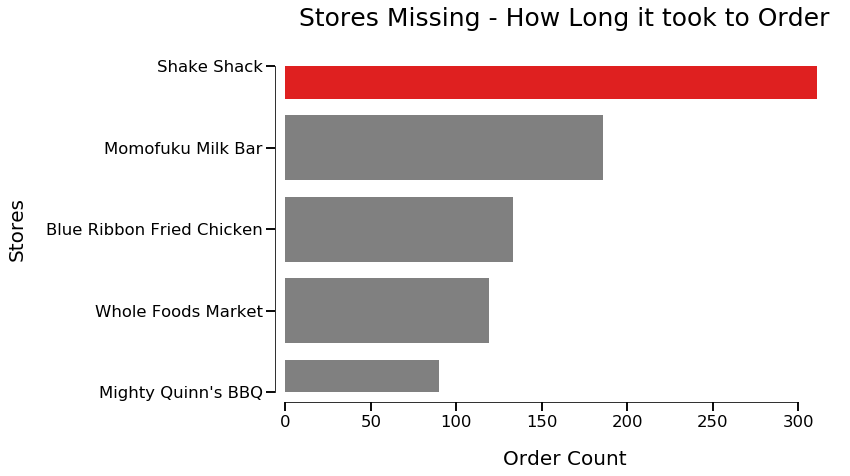

In [21]:
#Top stores that are missing order time
plt.figure(figsize=(10,6))    
clrs = ['grey' if (x < max(missing_order_time["pickup_place"].value_counts())) else 'red' for x in missing_order_time["pickup_place"].value_counts() ]
sns.countplot(y="pickup_place", data=missing_order_time, palette=clrs,
              order=missing_order_time["pickup_place"].value_counts().iloc[:5].index) 
sns.set_context('talk')
plt.xlabel("Order Count", fontsize = 20, labelpad = 20)
plt.ylabel("Stores", fontsize = 20, labelpad = 20)
plt.title("Stores Missing - How Long it took to Order", fontsize = 25, pad = 40)
sns.despine(offset=10, trim=True)

--------------------------------------------------------------------------------

# Stores Not Missing Jumpman Arrival/Departure Timestamp
Isolate a dataframe where Jumpman's arrival and departure from a store were not logged.

In [26]:
# new dataframe with only values that are NOT when_the_Jumpman_arrived_at_pickup
not_missing_arrival = jumpman23[jumpman23["when_the_Jumpman_arrived_at_pickup"].notnull()]
not_missing_arrival.head()

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,delivery_started,jumpman_arrival,jumpman_departure,delivery_completed
1,1377056,64452,104533,bicycle,Prince Street Pizza,Pizza,Neapolitan Rice Balls,3.0,Munchables,00:25:09.107093,...,40.719722,-73.991858,2014-10-16 21:58:58.654910,2014-10-16 22:26:02.120931,2014-10-16 22:48:23.091253,2014-10-16 22:59:22.948873,21:58:58.654910,22:26:02.120931,22:48:23.091253,22:59:22.948873
2,1476547,83095,132725,bicycle,Bareburger,Burger,Bare Sodas,1.0,Drinks,00:06:44.541717,...,40.728606,-73.995143,2014-10-28 21:39:52.654394,2014-10-28 21:37:18.793405,2014-10-28 21:59:09.984810,2014-10-28 22:04:40.634962,21:39:52.654394,21:37:18.793405,21:59:09.984810,22:04:40.634962
3,1485494,271149,157175,bicycle,Juice Press,Juice Bar,OMG! My Favorite Juice!,1.0,Cold Pressed Juices,NaN,...,40.751257,-74.005634,2014-10-30 10:54:11.531894,2014-10-30 11:04:17.759577,2014-10-30 11:16:37.895816,2014-10-30 11:32:38.090061,10:54:11.531894,11:04:17.759577,11:16:37.895816,11:32:38.090061
4,1327707,122609,118095,bicycle,Blue Ribbon Sushi,Japanese,Spicy Tuna & Tempura Flakes,2.0,Maki (Special Rolls),00:03:45.035418,...,40.709323,-74.015867,2014-10-10 00:07:18.450505,2014-10-10 00:14:42.702223,2014-10-10 00:25:19.400294,2014-10-10 00:48:27.150595,00:07:18.450505,00:14:42.702223,00:25:19.400294,00:48:27.150595
5,1423142,75169,91932,bicycle,Tamarind TriBeCa,Indian,Dum Aloo Gobi,1.0,Vegetarian Specialties,00:07:14.327405,...,40.725678,-74.000618,2014-10-22 18:56:36.348939,2014-10-22 19:18:49.953427,2014-10-22 19:27:10.578970,2014-10-22 19:36:53.801191,18:56:36.348939,19:18:49.953427,19:27:10.578970,19:36:53.801191


In [27]:
#top place where there is no record of time it takes to order
not_missing_arrival["pickup_place"].value_counts().nlargest(5)

Shake Shack                  289
Momofuku Milk Bar            179
The Meatball Shop            176
sweetgreen                   134
Blue Ribbon Fried Chicken    128
Name: pickup_place, dtype: int64

# Transporation
Segment transportation modes

In [28]:
#top transport 
not_missing_arrival["vehicle_type"].value_counts()

bicycle       3874
car           1114
walker         248
scooter         69
van             66
truck           42
motorcycle      20
Name: vehicle_type, dtype: int64

In [29]:
not_missing_arrival.shape

(5433, 22)

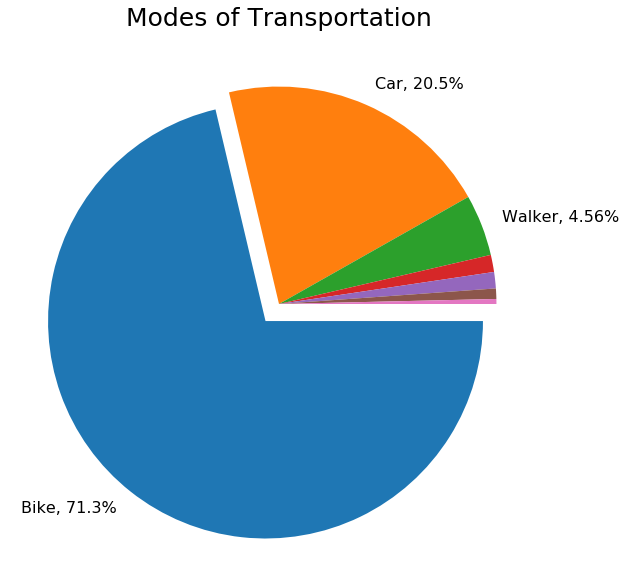

In [30]:
#Plot Pie Chart for transporation
plt.figure(figsize=(10,10))
labels = ("Bike, 71.3%" , "Car, 20.5%", 'Walker, 4.56%', '', '','','')
explode = (0.1,0,0, 0,0,0,0)
not_missing_arrival["vehicle_type"].value_counts().plot.pie(fontsize = 16, explode = explode, counterclock=False, labeldistance=1.1,radius = 1,labels = labels)
plt.title("Modes of Transportation", fontsize = 25)
plt.ylabel('')
plt.show()

## Transportation Delivery Time
Time taken from Jumpman leaving a store to dropping off the order

In [31]:
#function to calculate time
def vehicle_delivery_time(vehicle):
    vehicle_df = not_missing_arrival[not_missing_arrival['vehicle_type'] == vehicle]
    avg_time = (vehicle_df["when_the_Jumpman_arrived_at_dropoff"] - vehicle_df["when_the_Jumpman_left_pickup"]).mean()
    print("The average time for delivery by {} is {}".format(vehicle,avg_time))

In [32]:
vehicle_delivery_time('bicycle')
vehicle_delivery_time('car')
vehicle_delivery_time('walker')
vehicle_delivery_time('van')
vehicle_delivery_time('scooter')
vehicle_delivery_time('truck')
vehicle_delivery_time('motorcycle')

The average time for delivery by bicycle is 0 days 00:13:09.811952
The average time for delivery by car is 0 days 00:16:57.900500
The average time for delivery by walker is 0 days 00:14:27.909196
The average time for delivery by van is 0 days 00:16:22.074968
The average time for delivery by scooter is 0 days 00:12:59.177255
The average time for delivery by truck is 0 days 00:25:20.512299
The average time for delivery by motorcycle is 0 days 00:13:42.793901


---------------------------------------------

# Missing item descriptions
Find information on which stores were missing most item related data.

In [33]:
#dataframe for orders missing item information
missing_item_info = jumpman23[jumpman23["item_name"].isnull()]

In [34]:
#most information missing
missing_item_info["pickup_place"].value_counts().nlargest(10)

Duane Reade                              64
Chipotle Mexican Grill $1.99 Delivery    56
Philippe Chow                            24
Starbucks                                23
McDonald's                               19
Sushi Seki (archived)                    19
Sant Ambroeus                            15
Whole Foods Market                       15
Serafina Meatpacking                     15
sweetgreen                               15
Name: pickup_place, dtype: int64

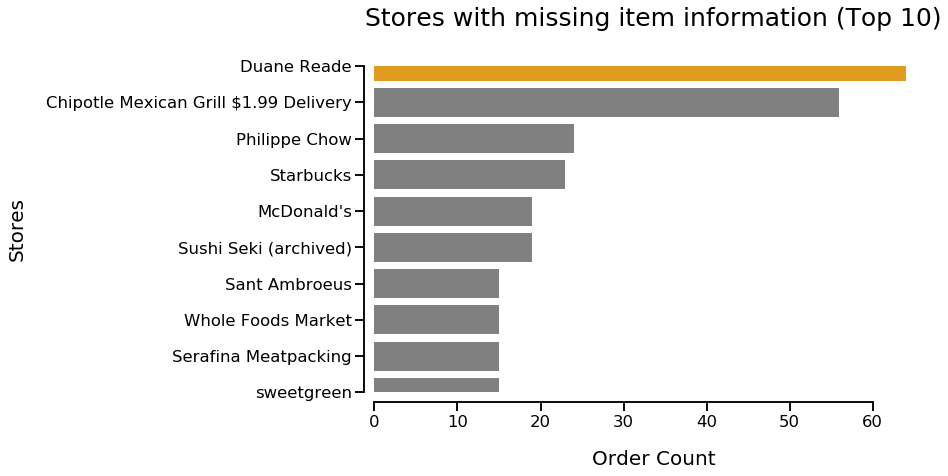

In [35]:
#Top Stores Missing Item information
plt.figure(figsize=(10,6))    
clrs = ['grey' if (x < max(missing_item_info["pickup_place"].value_counts())) else 'orange' for x in missing_item_info["pickup_place"].value_counts() ]
sns.countplot(y="pickup_place", data=missing_item_info, palette=clrs,
              order=missing_item_info["pickup_place"].value_counts().iloc[:10].index) 
sns.set_context('talk')
plt.xlabel("Order Count", fontsize = 20, labelpad = 20)
plt.ylabel("Stores", fontsize = 20, labelpad = 20)
plt.title("Stores with missing item information (Top 10)", fontsize = 25, pad = 40)
sns.despine(offset=10, trim=True)

In [36]:
# check store Duane Reade against entire dataset
jumpman23[jumpman23['pickup_place'] == "Duane Reade"]["pickup_place"].count()

64

Now we can see that Duane Reade have no records of the items being purchase on Jumpman23's platform. Looking into this further this could be because Duane Reade is a Drugstore. For security purposes it might not be allowed to disclose the exact medication Jumpmen are picking up.

In [37]:
# check store Chipotle against entire dataset
jumpman23[jumpman23['pickup_place'] == "Chipotle Mexican Grill $1.99 Delivery"]["pickup_place"].count()

80

Since Chipotle was the second highest for missing information I checked to to cross check it against the original dataset. We see above there are 80 Chipotle entries, so 24 are missing item information. Since Chipotle is a large chain it could be an operational issue as to way item information is not being disclosed. let's check against other big stores.

In [38]:
# check store Starbucks against entire dataset
jumpman23[jumpman23['pickup_place'] == "Starbucks"]["pickup_place"].count()

23

Starbucks are not recording any of their items. In general Starbucks orders are very customized, this could be a reason for lack of information.

In [39]:
# check store McDonald's against entire dataset
jumpman23[jumpman23['pickup_place'] == "McDonald's"]["pickup_place"].count()

62

62 recorded orders, and 19 missing could mean something similar to starbucks. More specialized orders can cause orders to not be properly recorded in the system.

--------------------------------------------------------

# Popular Pick Up Place
Find which stores are have the highest orders on Jumpman23

In [40]:
#most popular place
top_20 = jumpman23["pickup_place"].value_counts().nlargest(20)
top_20

Shake Shack                              311
Momofuku Milk Bar                        186
The Meatball Shop                        184
Blue Ribbon Sushi                        151
sweetgreen                               149
Blue Ribbon Fried Chicken                133
Whole Foods Market                       119
Parm                                     102
RedFarm Broadway                          93
Mighty Quinn's BBQ                        90
Chipotle Mexican Grill $1.99 Delivery     80
Momofuku Noodle Bar                       74
Hu Kitchen                                68
Trader Joe's                              68
TAO                                       67
Han Dynasty                               66
Sushi of Gari 46                          64
Duane Reade                               64
McDonald's                                62
RedFarm Hudson                            60
Name: pickup_place, dtype: int64

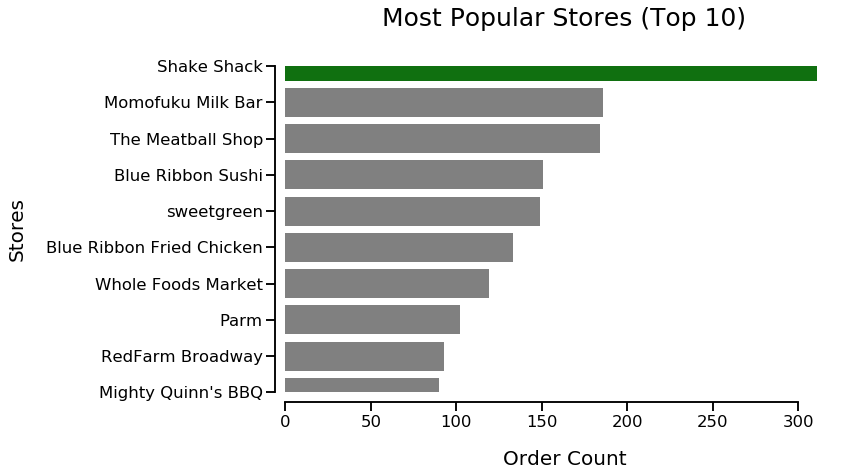

In [41]:
#Top Stores
plt.figure(figsize=(10,6))    
clrs = ['grey' if (x < max(jumpman23["pickup_place"].value_counts())) else 'green' for x in jumpman23["pickup_place"].value_counts() ]
sns.countplot(y="pickup_place", data=jumpman23, palette=clrs,
              order=jumpman23["pickup_place"].value_counts().iloc[:10].index) 
sns.set_context('talk')
plt.xlabel("Order Count", fontsize = 20, labelpad = 20)
plt.ylabel("Stores", fontsize = 20, labelpad = 20)
plt.title("Most Popular Stores (Top 10)", fontsize = 25, pad = 40)
sns.despine(offset=10, trim=True)

------------------------------------------------------------

# Popular Category
Find which categories are in high demand.

In [42]:
#most popular category
top_category = jumpman23["place_category"].value_counts().nlargest(20)
top_category

Italian           504
Burger            454
Japanese          433
American          405
Chinese           332
Dessert           315
Sushi             253
Salad             206
Grocery Store     187
Mexican           178
Bakery            140
BBQ               134
Pizza             106
Juice Bar          99
Indian             91
Donut              90
Fast Food          83
Seafood            81
Vegetarian         73
Middle Eastern     70
Name: place_category, dtype: int64

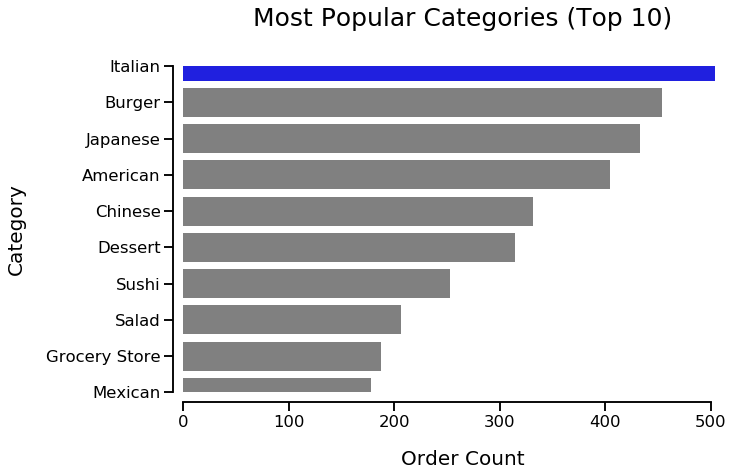

In [43]:
#Top Category
plt.figure(figsize=(10,6))    
clrs = ['grey' if (x < max(jumpman23["place_category"].value_counts())) else 'blue' for x in jumpman23["place_category"].value_counts() ]
sns.countplot(y="place_category", data=jumpman23, palette=clrs,
              order=jumpman23["place_category"].value_counts().iloc[:10].index) 
sns.set_context('talk')
plt.xlabel("Order Count", fontsize = 20, labelpad = 20)
plt.ylabel("Category", fontsize = 20, labelpad = 20)
plt.title("Most Popular Categories (Top 10)", fontsize = 25, pad = 40)
sns.despine(offset=10, trim=True)

-----------------------------------------------------

# Most Popular Store in a Category
Find main store in each category

In [44]:
# most popular place in a specific category
jumpman23.groupby(['place_category', 'pickup_place']).pickup_place.count().nlargest(20)

place_category  pickup_place                         
Burger          Shake Shack                              311
Dessert         Momofuku Milk Bar                        186
Italian         The Meatball Shop                        163
Japanese        Blue Ribbon Sushi                        151
Salad           sweetgreen                               149
American        Blue Ribbon Fried Chicken                133
Grocery Store   Whole Foods Market                       119
Italian         Parm                                     102
Chinese         RedFarm Broadway                          93
BBQ             Mighty Quinn's BBQ                        90
Mexican         Chipotle Mexican Grill $1.99 Delivery     80
Gluten-Free     Hu Kitchen                                68
Grocery Store   Trader Joe's                              68
Japanese        TAO                                       67
Chinese         Han Dynasty                               66
Drug Store      Duane Reade    

### Insights
It is interesting when we look at the most popular place, category and place by category that Italian food is the most common, but when the individual restaurant "The Meatball shop", their overall order count is much lower than Shake Shack. This could mean that people ordering burgers are saturated in ordering just from Shake Shack, but people ordering Italian food are ordering from a variety of different restaurants.

In [45]:
# italian restaurants
italian_restaurants = jumpman23[jumpman23["place_category"] == "Italian"]
print(italian_restaurants["pickup_place"].value_counts().shape)
italian_restaurants["pickup_place"].value_counts()

(53,)


The Meatball Shop                163
Parm                             102
Rubirosa                          53
Serafina Fabulous Pizza           21
Otto Enoteca Pizzeria             19
Osteria Morini                    15
Sant Ambroeus                     15
Serafina Meatpacking              15
Vezzo Thin Crust Pizza             7
Pepe Rosso To Go                   7
Tony's Di Napoli                   7
Mezzaluna Restaurants              5
Bar Pitti                          4
da Umberto                         3
Eataly                             3
Bistango                           3
Piccolo Angolo                     3
Carmine's                          3
Locanda Verde                      3
Frank Restaurant                   3
La Follia                          3
UVA Wine Bar & Restaurant          3
Morandi                            3
LAVO                               2
Aurora                             2
Galli Restaurant                   2
L'Apicio                           2
 

There are a total of 53 Italian restaurants with the order count per store is not significantly dominated by a single store. However, there are a lot of stores that have completed very low orders between 1-3 total.

In [46]:
# burger restaurants
burger_restaurants = jumpman23[jumpman23["place_category"] == "Burger"]
print(burger_restaurants["pickup_place"].value_counts().shape)
burger_restaurants["pickup_place"].value_counts()

(18,)


Shake Shack                    311
Five Guys Burgers and Fries     32
Bareburger                      32
J. G. Melon                     24
Burger Joint                    16
Lucky's Famous Burgers           7
5 Napkin Burger                  6
BurgerFi                         4
DuMont Burger                    4
Big Daddy's                      4
Amsterdam Burger Company         3
brgr                             3
Umami Burger                     3
Mark                             1
Whitmans                         1
Island Burgers & Shakes          1
Royale                           1
67 Burger                        1
Name: pickup_place, dtype: int64

Where as the Burger restaurants, Shake Shack is clear dominating orders by a significant amount. There is also a lot less restaurants. Only 18 which is close to 1/3 of the Italian restaurants available.

Look into the third highest category - Japanese

In [47]:
# japanese restaurants
japanese_restaurants = jumpman23[jumpman23["place_category"] == "Japanese"]
print(japanese_restaurants["pickup_place"].value_counts().shape)
japanese_restaurants["pickup_place"].value_counts()

(20,)


Blue Ribbon Sushi                151
TAO                               67
Blue Ribbon Sushi Bar & Grill     55
Blue Ribbon Sushi Izakaya         46
Sushi of Gari Tribeca             32
Yama Japanese Restaurant          22
Sushi Seki (archived)             18
Donburi-ya                         9
Benihana                           8
Terakawa Ramen                     4
Izakaya Ten                        4
Hibino                             3
Go! Go! Curry!                     3
Kobeyaki                           2
Samurai Mama                       2
KOI Restaurant                     2
Soba Nippon                        2
Sushi Choshi                       1
Kambi Ramen House                  1
Hiroko's Place                     1
Name: pickup_place, dtype: int64

There is also a low amount of Japanese restaurants compared to Italian food.

--------------------------------